In [5]:
!pip install --user --upgrade ipywidgets

     |████████████████████████████████| 134 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 70.4 MB/s eta 0:00:01


In [1]:
%matplotlib widget

In [14]:
!jupyter  labextension install jupyter-matplotlib

/software/jupyterlab/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/jupyter_server/transutils.py:13: FutureWarning: The alias `_()` will be deprecated. Use `_i18n()` instead.
  warnings.warn(warn_msg, FutureWarning)
[LabExtensionApp] WARNING | Unrecognized alias: 'user', it will have no effect.
Please supply at least one subcommand: build, check, develop, disable, enable, install, link, list, uninstall, unlink, update, watch


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as ipv
from scipy.interpolate import griddata
from matplotlib import cm
import bqplot.scales

In [2]:
from evaluation.validator import Validator



paths from config ['C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\util', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\data_utils\\data_loaders', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\models', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\trainers', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\data_utils', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments', 'C:\\Users\\tkachenko\\Anaconda3\\python38.zip', 'C:\\Users\\tkachenko\\Anaconda3\\DLLs', 'C:\\Users\\tkachenko\\Anaconda3\\lib', 'C:\\Users\\tkachenko\\Anaconda3', '', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tka

In [6]:
'''with open('test/Colon_MedianFilter/cp-0000/compare_all_thresholds.csv', newline='') as csvfile:
    report_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    print(next(report_reader))
    next(report_reader)
    data = []
    for row in report_reader:
        data.append(row)
        
    thresholds = 
        
print(data)'''

#validator = Validator('test/CV_3d_inception')
#best_threshold, best_sens, best_spec, means, idx = validator.find_best_threshold_in_checkpoint('test/CV_3d_inception/cp-l2_norm_0036')
#validator = Validator('test/Colon_MedianFilter')
#best_threshold, best_sens, best_spec, means, idx = validator.find_best_threshold_in_checkpoint('test/Colon_MedianFilter/cp-0000')
validator = Validator('C:\\Users\\tkachenko\\Desktop\\HSI\\paper post-processing\\results\\CV_3d_inception')
best_threshold, best_sens, best_spec, means, idx = validator.find_best_threshold_in_checkpoint('C:\\Users\\tkachenko\\Desktop\\HSI\\paper post-processing\\results\\CV_3d_inception\\cp-0000')


print(best_threshold)
print(means)
print(best_sens, best_spec)
if type(means) != list:
    means = [means]

def get_X_Y_Z_original(medians):

    X_raw = best_threshold * np.ones(medians.shape[0])
    Y_raw = medians
    Z_raw = means[0] * np.ones(medians.shape[0])
    #Z_raw = [means] * np.ones(medians.shape[0])
    
    return X_raw, Y_raw, Z_raw

test/Colon_MedianFilter/cp-0000
3 4 2
Best index and threshold for test/Colon_MedianFilter/cp-0000:  [23] [0.0024]
Best sensitivity and specificity for test/Colon_MedianFilter/cp-0000:  [0.84102273] [0.84122735]
Mean value of best sensitivity and specificity for test/Colon_MedianFilter/cp-0000:  0.841125
[0.0024]
0.841125
[0.84102273] [0.84122735]


In [43]:
#%matplotlib widget
#with open('test/CV_3d_inception/cp-l2_norm_0036/compare_all_thresholds_filtered.csv', newline='') as csvfile:
with open('C:\\Users\\tkachenko\\Desktop\\HSI\\paper post-processing\\results\\CV_3d_inception\\cp-0000\\compare_all_thresholds_filtered.csv', newline='') as csvfile:
    report_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    #print(next(report_reader))
    next(report_reader)
    data = []
    for row in report_reader:
        data.append(row)
        
    data = np.array(data)
    print(data[:10])
    
    thresholds = data[:, 2].astype(float)
    medians = data[:, -1].astype(float)
    sens = data[:, 3].astype(float)
    spec = data[:, 4].astype(float)
    
    #print('unique medians', np.unique(medians))
    
    X_o, Y_o, Z_o = get_X_Y_Z_original(np.unique(medians))
    #print(X_o, Y_o, Z_o)
    
    xv = np.linspace(min(thresholds), max(thresholds), 100);
    yv = np.linspace(min(medians), max(medians), 100);
    
    [X,Y] = np.meshgrid(xv, yv)
    
    #print('---------------X------------------')
    #print(X)
    #print('---------------Y------------------')
    #print(Y)
    Z_sens = griddata((thresholds,medians),sens,(X,Y), method='linear')
    Z_spec = griddata((thresholds,medians),spec,(X,Y), method='linear')
    Z_baseline = griddata((thresholds,medians),means[0] * np.ones(sens.shape[0]),(X,Y), method='linear')
    print('---------------Z sens------------------')
    print(Z_sens)
    
    #X, Y = np.meshgrid(thresholds, medians)
    #print(X.shape)
    #print(sens)
    #sens, spec = np.meshgrid(sens, spec)
    #spec, _ = np.meshgrid(spec, spec)
    #print(sens)
    
    
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # surf = ax.plot_surface(X, Y, Z_spec, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    #ipv.scatter(thresholds, medians, sens)
    
    '''scales = {
        'z': bqplot.scales.LinearScale(min=0, max=1),
    }'''
    print(np.max(X), np.min(X), np.max(Y), np.min(Y), np.max(Z_spec), np.min(Z_spec), np.max(Z_sens), np.min(Z_sens))
    
    
    
    ipv.xlim(xmin=np.min(X), xmax=np.max(X))
    ipv.ylim(ymin=np.min(Y), ymax=np.max(Y))
    ipv.zlim(zmin=min(np.min(Z_spec), np.min(Z_sens)), zmax=max(np.max(Z_spec), np.max(Z_sens)))
    #ipv.plot(X_o, Y_o, Z_o, color='green')
    ipv.plot_surface(X, Y, Z_spec, color='blue')
    ipv.plot_surface(X, Y, Z_sens)
    ipv.plot_surface(X, Y, Z_baseline, color='green')
    #ipv.plot_surface(X, Y, Z_spec - Z_sens, color='yellow')
    ipv.show()
    #ipv.save('1.html')
    ipv.clear()
    
    

[['18.10.2022 20:18:11' '36' '0.1056' '0.9188066962371998'
  '0.8794632874809354' '5']
 ['18.10.2022 20:18:52' '36' '0.129' '0.9142805951937134'
  '0.8868405090740765' '5']
 ['18.10.2022 20:19:33' '36' '0.1525' '0.9107232175695305'
  '0.8928062663190971' '5']
 ['18.10.2022 20:20:14' '36' '0.1759' '0.9065373924985188'
  '0.8978947942314176' '5']
 ['18.10.2022 20:20:55' '36' '0.1994' '0.9025110772907853'
  '0.9021600545878407' '5']
 ['18.10.2022 20:21:36' '36' '0.2228' '0.8991143823308559'
  '0.9060968102972772' '5']
 ['18.10.2022 20:22:16' '36' '0.2463' '0.8955014780277507'
  '0.9095231099182065' '5']
 ['18.10.2022 20:22:57' '36' '0.2697' '0.892198711938124'
  '0.9125500982024249' '5']
 ['18.10.2022 20:23:38' '36' '0.2932' '0.8882393728382453'
  '0.9155445140681729' '5']
 ['18.10.2022 20:24:18' '36' '0.3166' '0.8848109475444187'
  '0.9181695837894801' '5']]
---------------Z sens------------------
[[0.9188067  0.91818813 0.91756957 ...        nan        nan        nan]
 [0.91929475 0.918

[[-0.03934341 -0.03771663 -0.03608985 ...         nan         nan
          nan]
 [-0.03929206 -0.03778838 -0.03616161 ...         nan         nan
          nan]
 [-0.03924072 -0.03782213 -0.03623336 ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ...  0.03824596  0.03886385
   0.03946124]
 [        nan         nan         nan ...  0.03826864  0.03890581
   0.03951344]
 [        nan         nan         nan ...  0.03829132  0.03892848
   0.03956565]]


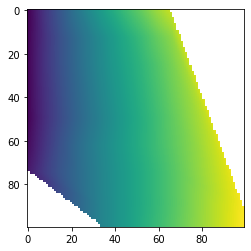

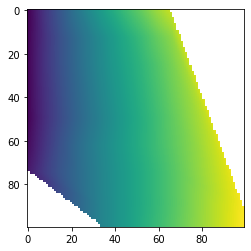


[-1.  1. nan ... nan nan nan]


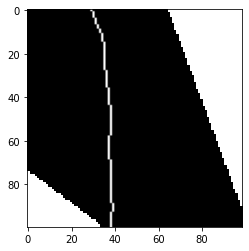

In [46]:
Z_diff = Z_spec - Z_sens

ipv.plot_surface(X, Y, Z_diff, color='yellow')
ipv.show()
ipv.clear()


print(Z_diff)

plt.imshow(Z_diff)
plt.show()

plt.imshow(Z_diff)
plt.show()

print()

plt.imshow(np.sign(Z_diff), cmap='gray')
plt.imshow(np.diff(np.sign(Z_diff)), cmap='gray')

print(np.unique(np.sign(Z_diff)))

In [ ]:
sens_v = np.linspace(min(sens), max(sens), 100)
spec_v = np.linspace(min(spec), max(spec), 100)

[X,Y] = np.meshgrid(xv, sens_v)
    
Z_sens = griddata((thresholds,medians),sens,(X,Y), method='linear')
Z_spec = griddata((thresholds,medians),spec,(X,Y), method='linear')

In [13]:
condition = (sens > means[0]) & (spec > means[0])
sens_more = sens[condition] 
spec_more = spec[condition] 
thresholds_more = thresholds[condition]
medians_more = medians[condition]

summ_ = sens_more + spec_more - (2 * means[0])
summ_i = np.argmax(summ_)
print('With best improvement', sens_more[summ_i], spec_more[summ_i], thresholds_more[summ_i], medians_more[summ_i], summ_[summ_i])


for se, sp, th, med, s in zip(sens_more, spec_more, thresholds_more, medians_more, summ_):
    print(se, sp, th, med, s, se-means[0], sp-means[0])
    


With best improvement 0.8567831812090482 0.8589950787911453 0.001 15.0 0.03352823711201003
0.8636072185028295 0.8411266676825785 0.0006 11.0 0.022483863297224405 0.022482207058737713 1.656238486691386e-06
0.8613427965003007 0.846281204166223 0.0008 11.0 0.025373977778340162 0.02021778505620886 0.005156192722131192
0.8597067779408482 0.8506735351599826 0.001 11.0 0.028130290212647235 0.018581766496756358 0.009548523715890767
0.86232924603585 0.8494985355256466 0.0006 15.0 0.029577758673313026 0.021204234591758242 0.008373524081554784
0.8588186975802395 0.8547659688238062 0.0008 15.0 0.031334643515862126 0.017693686136147746 0.01364095737971438
0.8567831812090482 0.8589950787911453 0.001 15.0 0.03352823711201003 0.015658169764956376 0.017870067347053542


In [8]:
print(sens.shape)

for m in np.unique(medians):
    condition = medians == m
    sens_c = sens[condition] 
    spec_c = spec[condition] 
    thresholds_c = thresholds[condition]
    medians_c = medians[condition]
    
    diff = np.abs(sens_c - spec_c)
    diff_i = np.argmin(diff)
    print('Best threshold with harmony', sens_c[diff_i], 
          spec_c[diff_i], thresholds_c[diff_i], medians_c[diff_i], diff[diff_i])


(61,)
Best threshold with harmony 0.9188066962371998 0.8794632874809354 0.1056 5.0 0.03934340875626441
Best threshold with harmony 0.9100850496772808 0.9117041809764574 0.2228 10.0 0.0016191312991766793
Best threshold with harmony 0.9146272915728715 0.9154611039259484 0.2228 15.0 0.0008338123530768904
Best threshold with harmony 0.9205329036399743 0.9189507342511302 0.2228 25.0 0.0015821693888441457
Best threshold with harmony 0.9207627924824935 0.9202417194921422 0.2228 30.0 0.0005210729903513123
Best threshold with harmony 0.9225628705751522 0.9213107804899004 0.2228 35.0 0.0012520900852517336
Best threshold with harmony 0.9231011527668813 0.9240434982267965 0.2346 41.0 0.0009423454599152281
Best threshold with harmony 0.9256782229920989 0.9215009527080132 0.2111 45.0 0.004177270284085655


In [ ]:
#!/usr/bin/python3

import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


# ======
## data:

DATA = array([
    [-0.807237702464, 0.904373229492, 111.428744443],
    [-0.802470821517, 0.832159465335, 98.572957317],
    [-0.801052795982, 0.744231916692, 86.485869328],
    [-0.802505546206, 0.642324228721, 75.279804677],
    [-0.804158144115, 0.52882485495, 65.112895758],
    [-0.806418040943, 0.405733109371, 56.1627277595],
    [-0.808515314192, 0.275100227689, 48.508994388],
    [-0.809879521648, 0.139140394575, 42.1027499025],
    [-0.810645106092, -7.48279012695e-06, 36.8668106345],
    [-0.810676720161, -0.139773175337, 32.714580273],
    [-0.811308686707, -0.277276065449, 29.5977405865],
    [-0.812331692291, -0.40975978382, 27.6210856615],
    [-0.816075037319, -0.535615685086, 27.2420699235],
    [-0.823691366944, -0.654350489595, 29.1823292975],
    [-0.836688691603, -0.765630198427, 34.2275056775],
    [-0.854984518665, -0.86845932028, 43.029581434],
    [-0.879261949054, -0.961799684483, 55.9594146815],
    [-0.740499820944, 0.901631050387, 97.0261463995],
    [-0.735011699497, 0.82881933383, 84.971061395],
    [-0.733021568161, 0.740454485354, 73.733621269],
    [-0.732821755233, 0.638770044767, 63.3815970475],
    [-0.733876941678, 0.525818698874, 54.0655910105],
    [-0.735055978521, 0.403303715698, 45.90859502],
    [-0.736448900325, 0.273425879041, 38.935709456],
    [-0.737556181137, 0.13826504904, 33.096106049],
    [-0.738278724065, -9.73058423274e-06, 28.359664343],
    [-0.738507612286, -0.138781586244, 24.627237837],
    [-0.738539663773, -0.275090412979, 21.857410904],
    [-0.739099040189, -0.406068448513, 20.1110519655],
    [-0.741152200369, -0.529726022182, 19.7019157715],
])

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]


# ======
## plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()

plt.show() # or:

In [2]:
import numpy as np

predictions = np.load('C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\test\\Colon_MedianFilter\\cp-0000\\predictions_whole.npy', allow_pickle=True)

(307200, 1)


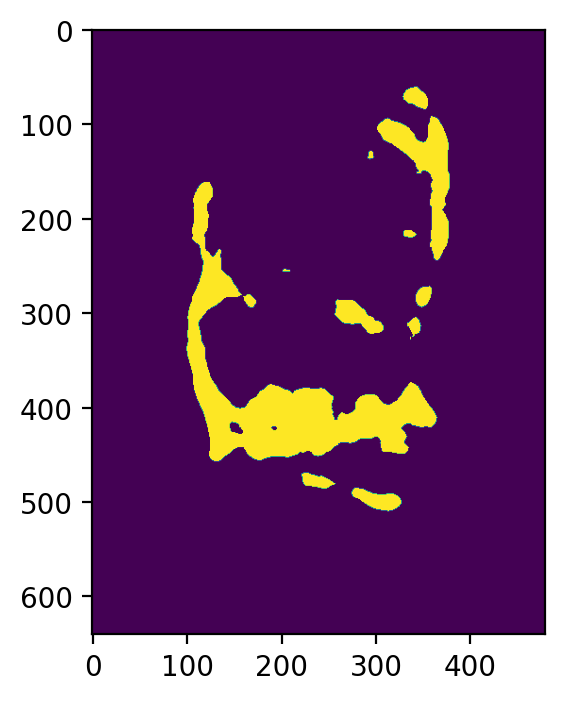

In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
print(predictions[0]['predictions'].shape)
plt.figure(dpi=200)
#plt.imshow(np.reshape(predictions[0]['predictions'], (640, 480)), vmin=0, vmax=1)
#plt.imshow(np.where(np.reshape(predictions[0]['predictions'], (640, 480)) > 0.5, 1, 0), vmin=0, vmax=1)
plt.imshow(median_filter(np.where(np.reshape(predictions[0]['predictions'], (640, 480)) > 0.5, 1, 0), size=25), vmin=0, vmax=1)

In [8]:
import numpy as np
import os
#import cv2
import matplotlib.pyplot as plt 
import imageio as iio

In [18]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

255


<ipython-input-18-7f92b3a0e387>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-18-7f92b3a0e387>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


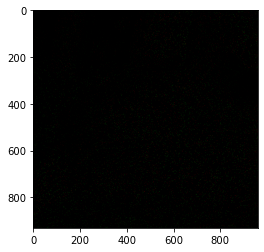

array([  0,   2,   4,   6,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [19]:
image = np.array(iio.imread("C:\\Users\\tkachenko\\Desktop\\HSI\\paper post-processing\\cat.jpg"))
print(np.max(image))
noisy_image = noisy("s&p", image)

plt.imshow(noisy_image-image)
plt.show()
np.unique(noisy_image-image)

['C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_07_12_11_15_49_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_07_15_11_33_28_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_07_17_15_38_14_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_07_25_11_56_38_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_08_09_12_17_55_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_08_12_10_52_33_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_08_23_12_15_26_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_08_28_14_00_34_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_09_04_12_43_40_SpecCube.dat_Mask JW Kolo.png',
 'C:\\Users\\tkachenko\\Desktop\\HSI\\data masks\\2019_09_09_17_01_38_SpecCube.dat